## Imports

In [1]:
#pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dense
from sklearn.linear_model import LinearRegression


# Data Pre-Processing

## Download & Normalization

In [3]:
raw_data = pd.read_csv('cancer_reg.csv',encoding='latin-1')

In [4]:
raw_data.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [5]:
data = raw_data[['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]
data = data.dropna()

len(data.columns)

31

In [6]:
X = (data-np.mean(data))/np.std(data)   # Data normalization E = 0, Var = 1

## Principal Component Analysis

In [7]:
U, D, Vt = np.linalg.svd(X)   # Singular Value Decomposition to initiate Principal Component Analysis (PCA)

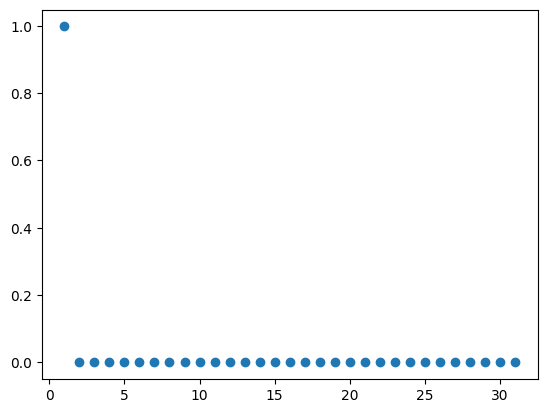

In [8]:
total_inertia = np.sum(D)

svd_inertia = []
index = []

for i in range(len(D)):

  svd_inertia.append(D[i]/total_inertia)
  index.append(i+1)

plt.scatter(index,svd_inertia)


Plot of decreasing singular values. Note that with the three first ones we reach 28% of total inertia of the data.

In [9]:
np.sum(svd_inertia[0:3])

0.9985434144053805

Projection of the matrix of data on principal axis

In [10]:
Xp = np.dot(X,Vt)

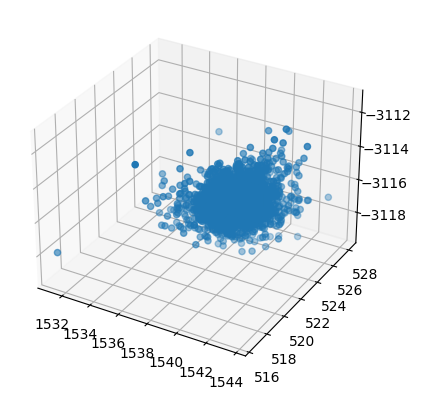

In [11]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(Xp[:,0],Xp[:,1],Xp[:,2]) # Projection on the most relevant axis


AS we can see there are no multiple centers of class. Which means we do not need to wisely select data when creating data sets.

## Data set creation

In [12]:
train_dataset = X.sample(frac=0.8, random_state=0)
test_dataset = X.drop(train_dataset.index)

c:\Users\mrxod\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


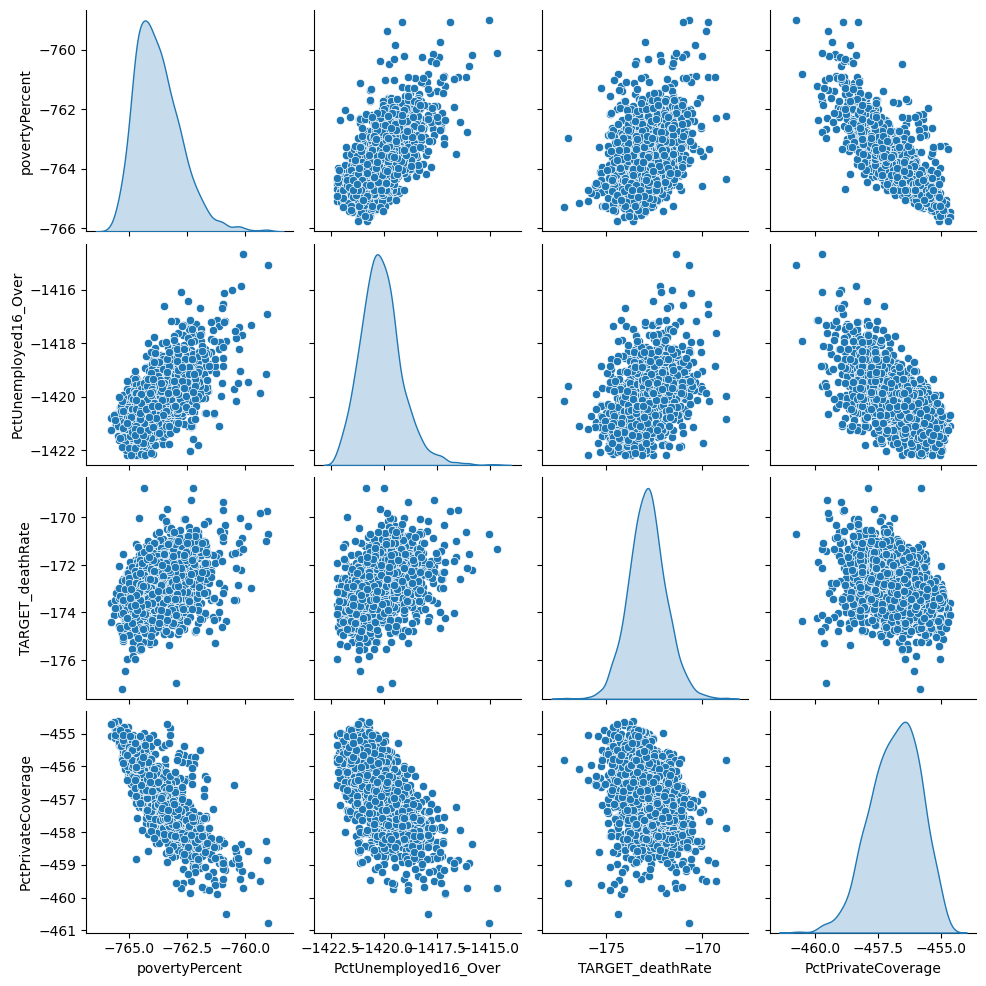

In [13]:
sns.pairplot(train_dataset[['povertyPercent','PctUnemployed16_Over', 'TARGET_deathRate', 'PctPrivateCoverage']], diag_kind='kde')

Check if a linear regression is relevant for TARGET_deathRate

In [14]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,2332.0,-2.999076,1.000214,-3.418475,-3.370562,-3.302511,-3.063467,23.068416
avgDeathsPerYear,2332.0,-9.296460,1.000214,-9.656931,-9.607921,-9.541267,-9.378063,17.802533
TARGET_deathRate,2332.0,-172.875390,1.000214,-177.214257,-173.512949,-172.886965,-172.278269,-168.690693
incidenceRate,2332.0,-84.353120,1.000214,-89.002091,-84.867953,-84.253303,-83.747349,-73.698628
medIncome,2332.0,3.480725,1.000214,1.467190,2.788662,3.326049,3.928424,9.999349
popEst2015,2332.0,0.287715,1.000214,-0.011969,0.019293,0.064173,0.184137,29.660165
povertyPercent,2332.0,-763.735970,1.000214,-765.875599,-764.476249,-763.885413,-763.170190,-759.003238
studyPerCap,2332.0,-8.331615,1.000214,-8.613719,-8.613719,-8.613719,-8.473930,8.446580
MedianAge,2332.0,-111.650070,1.000214,-112.167329,-111.812996,-111.742130,-111.673549,-98.412376
MedianAgeMale,2332.0,-945.694379,1.000214,-949.016721,-946.308878,-945.689942,-945.109690,-941.705545


In [15]:
train_features = train_dataset.copy() # Avoid to corrupt data set
test_features = test_dataset.copy()

train_labels = train_features.pop('TARGET_deathRate') # data set without Y
test_labels = test_features.pop('TARGET_deathRate')

# Linear Regression

## Exact formula

In [16]:
phi = X.copy()
phi = phi[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]
phi['b'] = np.ones(len(phi.index))    # enable to introduce a bias
Y = X['TARGET_deathRate']

In [17]:
phi

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,b
1,-3.302511,-9.525583,-85.043033,3.578547,0.111867,-763.481156,-8.573330,-111.922725,-947.121231,-938.760881,...,-517.458186,-626.039212,-799.260276,-292.524204,-335.003346,-1886.818434,-1321.790834,-743.536662,-2392.979695,1.0
2,-3.351813,-9.564792,-86.208347,3.679695,0.046967,-764.103089,-8.530604,-111.648403,-944.838906,-936.440479,...,-518.379689,-624.633208,-798.316846,-292.421834,-335.018942,-1887.500259,-1322.057593,-742.155379,-2393.273000,1.0
3,-3.126136,-9.266809,-84.689108,3.256794,0.207024,-763.714381,-8.014937,-111.698696,-945.187057,-936.900724,...,-518.369097,-624.224189,-797.682470,-292.372121,-335.016023,-1887.233915,-1322.429210,-742.676590,-2392.848135,1.0
4,-3.383061,-9.611841,-86.200817,3.729979,0.015733,-764.429604,-8.613719,-111.572965,-944.103920,-935.845996,...,-518.358505,-624.390353,-798.056589,-292.229517,-335.050858,-1887.423690,-1322.662830,-742.218930,-2391.782603,1.0
5,-3.125441,-9.364830,-83.277176,3.925317,0.163669,-763.947606,-8.298702,-111.639259,-944.935614,-936.018588,...,-518.623305,-624.492608,-798.463240,-292.786877,-334.956841,-1887.089648,-1321.905352,-742.646316,-2392.672895,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,-2.059780,-9.568712,-84.253303,3.692949,0.070318,-764.351862,-7.349503,-111.941013,-947.353331,-938.741704,...,-516.473132,-626.908378,-800.203706,-292.218172,-334.991381,-1887.147675,-1322.522766,-743.855739,-2393.152446,1.0
3042,-2.059780,-9.633406,-84.253303,3.481955,0.004126,-764.445152,-8.613719,-111.666691,-945.399816,-935.865173,...,-517.352266,-625.962521,-799.601863,-292.460600,-334.808336,-1887.553219,-1322.338548,-742.670147,-2391.307930,1.0
3043,-2.059780,-9.578514,-84.253303,3.618476,0.093920,-763.450060,-7.954579,-111.982161,-947.682141,-939.201949,...,-516.928587,-626.333195,-798.869891,-293.341517,-334.911052,-1886.129580,-1319.002742,-742.526406,-2391.107266,1.0
3044,-2.059780,-9.572633,-84.253303,3.828476,0.086386,-764.040896,-5.172827,-111.970731,-947.450040,-939.240303,...,-517.013323,-626.614396,-799.016285,-292.600776,-334.911976,-1887.174510,-1321.270367,-742.047420,-2391.290592,1.0


In [18]:
inv_phiT_phi = np.linalg.inv(np.dot(np.transpose(phi),phi))
phiT_Y = np.dot(np.transpose(phi),Y)

In [19]:
weights = np.dot(inv_phiT_phi,phiT_Y)

In [20]:
weights   # My weights, bias included at the end

array([-1.49232920e-01,  2.99868719e-01,  3.46027059e-01,  6.76702355e-02,
       -1.78797506e-01,  5.57062328e-02, -6.69187667e-03, -5.30821475e-03,
       -7.34763452e-02, -4.37700284e-02,  1.49933309e-02,  3.87211428e-01,
       -6.57299277e-02,  4.66691225e-02, -2.06052545e-02,  1.07225311e-01,
       -2.55703775e-01, -1.97199712e-01,  1.71476197e-02, -2.16956127e-01,
        4.71823028e-03,  1.57156746e-01, -8.70100444e-02,  7.53408519e-02,
       -7.70300536e-02, -5.18420595e-03, -7.95651460e-03, -1.19886250e-01,
       -3.60006455e-01, -7.24350550e-02, -7.05287796e+02])

R2 Computing 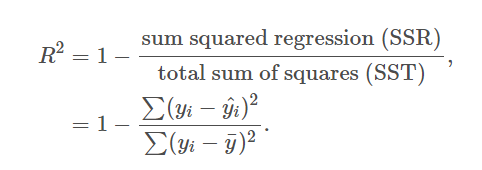

In [21]:
Sum1 = 0
Sum2 = 0

Ymean = np.mean(Y)

for index in phi.index:

  Sum1 += (Y[index]-(np.dot(phi[(phi.index == index)],weights)))**2

  Sum2 += (Y[index]-Ymean)**2

R2 = float(1 - Sum1/Sum2 )



In [22]:
R2      # My R2

0.5016277760257074

In [23]:
reg = LinearRegression().fit(phi, Y)

reg.score(phi, Y)   # R2 of skLearn


0.5016277760466731

In [24]:
reg.coef_     # Weights of skLearn

array([-0.14923154,  0.2998678 ,  0.34602705,  0.06767023, -0.178797  ,
        0.05570624, -0.00669188, -0.00530821, -0.07347635, -0.04377003,
        0.01499334,  0.38721143, -0.06572993,  0.04666912, -0.02060525,
        0.10722531, -0.25570377, -0.19719971,  0.01714762, -0.2169561 ,
        0.0047182 ,  0.15715675, -0.08701006,  0.07534087, -0.07703005,
       -0.00518421, -0.00795652, -0.11988625, -0.36000646, -0.07243505,
        0.        ])

In [25]:
reg.intercept_   # Bias of skLearn

-705.2877354987797

# Artificial Neural Network

## ANN-oneL-16

In [26]:
def build_and_compile_model():
  model = keras.Sequential([
      keras.Input(shape=(len(train_features.columns),)),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.SGD(0.001))
  return model

In [27]:
target_model = build_and_compile_model()

NameError: name 'keras' is not defined

In [ ]:
target_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (None, 16)               496       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 1)                17        
 pper)                                                           
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history = target_model.fit(
    train_features,
    train_dataset['TARGET_deathRate'],
    validation_split=0.2,
    verbose=0, epochs=60)

CPU times: user 7.39 s, sys: 334 ms, total: 7.73 s
Wall time: 7.72 s


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [TARGET_deathRate]')
  plt.legend()
  plt.grid(True)

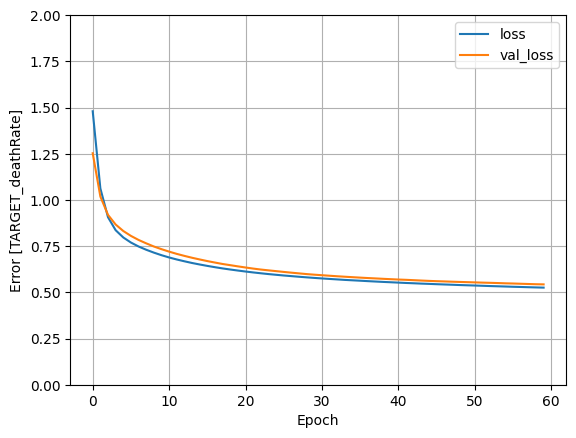

In [ ]:
plot_loss(history)